In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df0 = pd.read_csv('Telco_Customer_Churn.csv')

In [4]:
#Loop to display 'head' &'tail' of the DataSet
for i in [df0.head(), df0.tail()]:
    display(i)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
print("No of col's are:", len(df0.columns))
for col in df0.columns:
    display(col)

No of col's are: 21


'customerID'

'gender'

'SeniorCitizen'

'Partner'

'Dependents'

'tenure'

'PhoneService'

'MultipleLines'

'InternetService'

'OnlineSecurity'

'OnlineBackup'

'DeviceProtection'

'TechSupport'

'StreamingTV'

'StreamingMovies'

'Contract'

'PaperlessBilling'

'PaymentMethod'

'MonthlyCharges'

'TotalCharges'

'Churn'

# Aim: Model Building

In [6]:
# Let's start with removing non-essential col's from our dataSet to built a  model

In [7]:
df0.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [8]:
# drop the customerId column
df0 = df0.drop('customerID', axis=1)

In [9]:
df0.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [10]:
# duplicating df0 dataSet
df1 = df0.copy()

In [11]:

# Aim: i want to add a new col named 'family' and put 'Yes' if my index have partner or dependencied (any of them) based on 'Partner', 'Dependents' column and 'No' if they have none from 'Partner', 'Dependents'column

def family(row):
    if row['Partner'] == "Yes" or row['Dependents'] == "Yes":
        return "Yes"
    else:
        return "No"

df1['family'] = df1.apply(family, axis=1)

In [12]:
df1.head(6)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,family
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Yes
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,No


In [13]:
yes_count = 0
no_count = 0

for index, row in df1.iterrows():
    if row['family'] == 'Yes':
        yes_count += 1
    elif row['family'] == 'No':
        no_count += 1

print("Number of 'Yes':", yes_count)
print("Number of 'No':", no_count)

Number of 'Yes': 3763
Number of 'No': 3280


In [14]:
df1.drop(['Partner', 'Dependents'], axis=1, inplace=True)

In [15]:
df1.head()

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,family
0,Female,0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Yes
1,Male,0,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,No
2,Male,0,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No
3,Male,0,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No
4,Female,0,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No


In [16]:
df2 = df1.copy()

In [17]:
df2.head(20)

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,family
0,Female,0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Yes
1,Male,0,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,No
2,Male,0,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No
3,Male,0,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No
4,Female,0,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No
5,Female,0,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,No
6,Male,0,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,Yes
7,Female,0,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No,No
8,Female,0,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Yes
9,Male,0,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,Yes


In [18]:
print(df2['MultipleLines'].unique())

['No phone service' 'No' 'Yes']


In [19]:
df2['MultipleLines'].replace('No phone service', 'No', inplace=True)
df2.head(1)

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,family
0,Female,0,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Yes


In [20]:
print(df2['InternetService'].unique())

['DSL' 'Fiber optic' 'No']


In [21]:
df2['InternetService'].replace(['DSL','Fiber optic'], 'Yes', inplace=True)
df2.head()

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,family
0,Female,0,1,No,No,Yes,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Yes
1,Male,0,34,Yes,No,Yes,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,No
2,Male,0,2,Yes,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No
3,Male,0,45,No,No,Yes,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No
4,Female,0,2,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No


In [22]:
print(df2['OnlineSecurity'].unique())

['No' 'Yes' 'No internet service']


In [23]:
df2['OnlineSecurity'].replace('No internet service', 'No', inplace = True)

In [24]:
print(df2['OnlineBackup'].unique())

['Yes' 'No' 'No internet service']


In [25]:
df2['OnlineBackup'].replace('No internet service', 'No', inplace = True)

In [26]:
print(df2['OnlineBackup'].unique())

['Yes' 'No']


In [27]:
print(df2['DeviceProtection'].unique())

['No' 'Yes' 'No internet service']


In [28]:
df2['DeviceProtection'].replace('No internet service', 'No', inplace = True)
df2['TechSupport'].replace('No internet service', 'No', inplace = True)
df2['StreamingTV'].replace('No internet service', 'No', inplace = True)
df2['StreamingMovies'].replace('No internet service', 'No', inplace = True)

In [29]:
for col in ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    print(df2[col].unique())

['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']


In [30]:
df2.head()

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,family
0,Female,0,1,No,No,Yes,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Yes
1,Male,0,34,Yes,No,Yes,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,No
2,Male,0,2,Yes,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No
3,Male,0,45,No,No,Yes,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No
4,Female,0,2,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No


In [31]:
# create a new column 'FullService'
df2['FullService'] = df2[['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].apply(lambda row: 'Yes' if row.notna().all() else 'No', axis=1)

# create a new column 'HalfService'
df2['HalfService'] = df2[['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].apply(lambda row: 'Yes' if row.notna().all() else list(row[row.isna()].index), axis=1)

# create a new column 'NumService'
df2['NumService'] = df2[['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].apply(lambda row: row.count(), axis=1)

In [32]:
df2.head(10)

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,family,FullService,HalfService,NumService
0,Female,0,1,No,No,Yes,No,Yes,No,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,Yes,Yes,Yes,8
1,Male,0,34,Yes,No,Yes,Yes,No,Yes,No,...,One year,No,Mailed check,56.95,1889.5,No,No,Yes,Yes,8
2,Male,0,2,Yes,No,Yes,Yes,Yes,No,No,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No,Yes,Yes,8
3,Male,0,45,No,No,Yes,Yes,No,Yes,Yes,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,No,Yes,Yes,8
4,Female,0,2,Yes,No,Yes,No,No,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No,Yes,Yes,8
5,Female,0,8,Yes,Yes,Yes,No,No,Yes,No,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,No,Yes,Yes,8
6,Male,0,22,Yes,Yes,Yes,No,Yes,No,No,...,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,Yes,Yes,Yes,8
7,Female,0,10,No,No,Yes,Yes,No,No,No,...,Month-to-month,No,Mailed check,29.75,301.9,No,No,Yes,Yes,8
8,Female,0,28,Yes,Yes,Yes,No,No,Yes,Yes,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Yes,Yes,Yes,8
9,Male,0,62,Yes,No,Yes,Yes,Yes,No,No,...,One year,No,Bank transfer (automatic),56.15,3487.95,No,Yes,Yes,Yes,8


In [33]:
for col in ['FullService', 'HalfService', 'NumService']:
    print(df2[col].unique())

['Yes']
['Yes']
[8]


In [34]:
df2.drop(['FullService', 'HalfService', 'NumService'], axis=1, inplace=True)

In [35]:
df2.head(1)

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,family
0,Female,0,1,No,No,Yes,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Yes


In [36]:
# create a new column 'FullService'
df2['FullService'] = df2[['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].apply(lambda row: 'Yes' if row.notna().all() else 'No', axis=1)

In [37]:
df2.head(10)

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,family,FullService
0,Female,0,1,No,No,Yes,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Yes,Yes
1,Male,0,34,Yes,No,Yes,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,No,Yes
2,Male,0,2,Yes,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No,Yes
3,Male,0,45,No,No,Yes,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No,Yes
4,Female,0,2,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No,Yes
5,Female,0,8,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,No,Yes
6,Male,0,22,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,Yes,Yes
7,Female,0,10,No,No,Yes,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No,No,Yes
8,Female,0,28,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Yes,Yes
9,Male,0,62,Yes,No,Yes,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,Yes,Yes


In [38]:
df2.drop('FullService', axis = 1, inplace = True)

In [39]:
df2.head()

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,family
0,Female,0,1,No,No,Yes,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Yes
1,Male,0,34,Yes,No,Yes,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,No
2,Male,0,2,Yes,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No
3,Male,0,45,No,No,Yes,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No
4,Female,0,2,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No


In [40]:
df2.dtypes

gender               object
SeniorCitizen         int64
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
family               object
dtype: object

In [41]:
df2['TotalCharges'] = df2['TotalCharges'].astype('float64')
df2['TotalCharges'] = df2['TotalCharges'].replace(' ', np.nan).astype(float)

ValueError: could not convert string to float: ''

In [42]:
df2['TotalCharges'] = df2['TotalCharges'].replace(' ', np.nan).astype(float)

In [43]:
df2['TotalCharges'] = df2['TotalCharges'].astype('float64')
df2['TotalCharges'] = df2['TotalCharges'].replace(' ', np.nan).astype(float)

In [44]:
df2.dtypes

gender               object
SeniorCitizen         int64
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
family               object
dtype: object

In [45]:
# extract tenure data for churned and non-churned customers
tenure_churn_yes = df2[df2. Churn == 'Yes'].tenure
tenure_churn_no = df2[df2. Churn == 'No'].tenure

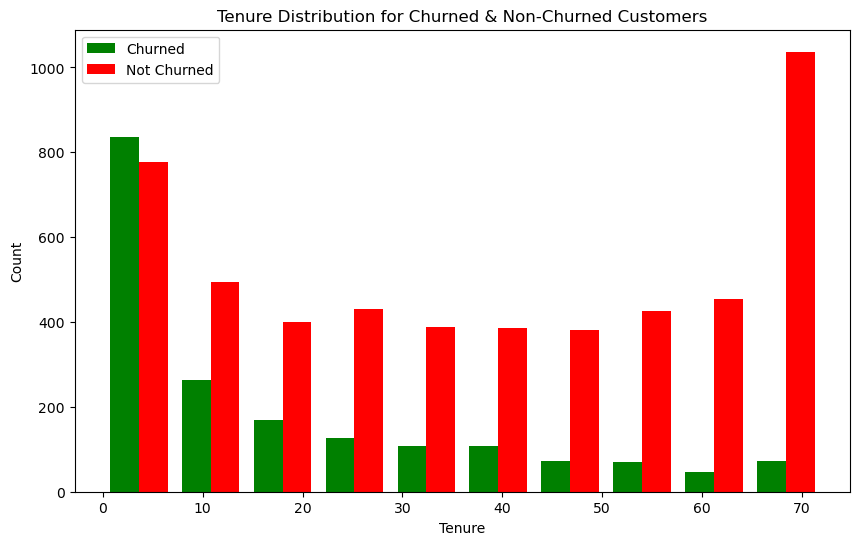

In [46]:
import matplotlib.pyplot as plt

# create a new figure with a larger size
plt.figure(figsize=(10, 6))

# creating a histogram of tenure for churned and non-churned customers
plt.hist([tenure_churn_yes, tenure_churn_no], bins=10, color=['green', 'red'], label=['Churned', 'Not Churned'])

# add labels and legend
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Tenure Distribution for Churned & Non-Churned Customers')
plt.legend()

# display the plot
plt.show()

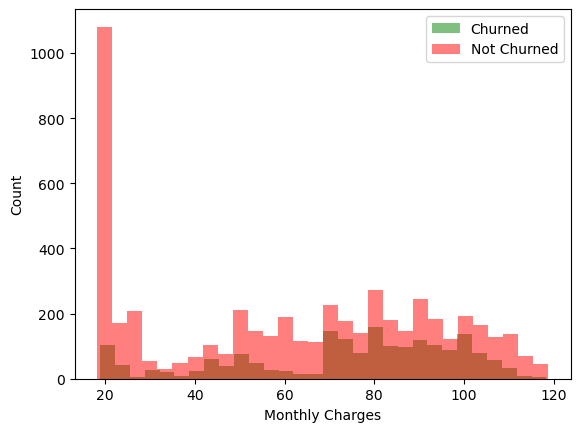

In [47]:
# extract data for churned and non-churned customers
churned = df2[df2.Churn == 'Yes']
not_churned = df2[df2.Churn == 'No']

# create histograms of MonthlyCharges for churned and non-churned customers
plt.hist(churned.MonthlyCharges, bins=30, alpha=0.5, color='green', label='Churned')
plt.hist(not_churned.MonthlyCharges, bins=30, alpha=0.5, color='red', label='Not Churned')

# add axis labels and legend
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.legend()

# display the plot
plt.show()

In [52]:
# Churned : people who left the job
# NotChurned : people who hasn't left the job

In [ ]:
'''
#NOTE: 

'0 for Yes' and '1 for No' for each col's with values 'Yes and No'

Also in gender column there is Male and Female, i want to initilize '0 for male' & '1 for female'
'''


In [48]:
# create a dictionary to map Yes/No values to 0/1
map_dict = {'Yes': 0, 'No': 1}

# iterate over the columns you want to convert
for col in ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn', 'family']:
    # use the map dictionary to replace the Yes/No values with 0/1
    df2[col] = df2[col].map(map_dict)

In [49]:
df2.head()

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,family
0,Female,0,1,1,1,0,1,0,1,1,1,1,Month-to-month,0,Electronic check,29.85,29.85,1,0
1,Male,0,34,0,1,0,0,1,0,1,1,1,One year,1,Mailed check,56.95,1889.50,1,1
2,Male,0,2,0,1,0,0,0,1,1,1,1,Month-to-month,0,Mailed check,53.85,108.15,0,1
3,Male,0,45,1,1,0,0,1,0,0,1,1,One year,1,Bank transfer (automatic),42.30,1840.75,1,1
4,Female,0,2,0,1,0,1,1,1,1,1,1,Month-to-month,0,Electronic check,70.70,151.65,0,1


In [50]:
map_dict2 = {'Male': 0, 'Female': 1}

for cols in ['gender']:
    df2[cols] = df2[cols].map(map_dict2)

In [51]:
df2.head()

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,family
0,1,0,1,1,1,0,1,0,1,1,1,1,Month-to-month,0,Electronic check,29.85,29.85,1,0
1,0,0,34,0,1,0,0,1,0,1,1,1,One year,1,Mailed check,56.95,1889.50,1,1
2,0,0,2,0,1,0,0,0,1,1,1,1,Month-to-month,0,Mailed check,53.85,108.15,0,1
3,0,0,45,1,1,0,0,1,0,0,1,1,One year,1,Bank transfer (automatic),42.30,1840.75,1,1
4,1,0,2,0,1,0,1,1,1,1,1,1,Month-to-month,0,Electronic check,70.70,151.65,0,1


In [78]:
def uniqueCol(df):
    for col in df.columns:
        print(col, df[col].unique())

uniqueCol(df2)


gender [1 0]
SeniorCitizen [0 1]
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService [1 0]
MultipleLines [1 0]
InternetService [0 1]
OnlineSecurity [1 0]
OnlineBackup [0 1]
DeviceProtection [1 0]
TechSupport [1 0]
StreamingTV [1 0]
StreamingMovies [1 0]
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling [0 1]
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn [1 0]
family [0 1]


In [79]:
print(df2['Contract'].unique())

['Month-to-month' 'One year' 'Two year']


In [56]:
#Lets Hot-Encode this

In [84]:
df3 = df2.copy()

In [85]:
df3.head(1)

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,family
0,1,0,1,1,1,0,1,0,1,1,1,1,Month-to-month,0,Electronic check,29.85,29.85,1,0


In [91]:
df3 = pd.get_dummies(data = df3, columns = ['Contract'])

In [92]:
df3 = pd.get_dummies(data = df3, columns = ['PaymentMethod'])

In [95]:
uniqueCol(df3)

gender [1 0]
SeniorCitizen [0 1]
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService [1 0]
MultipleLines [1 0]
InternetService [0 1]
OnlineSecurity [1 0]
OnlineBackup [0 1]
DeviceProtection [1 0]
TechSupport [1 0]
StreamingTV [1 0]
StreamingMovies [1 0]
PaperlessBilling [0 1]
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn [1 0]
family [0 1]
Contract_Month-to-month [1 0]
Contract_One year [0 1]
Contract_Two year [0 1]
PaymentMethod_Bank transfer (automatic) [0 1]
PaymentMethod_Credit card (automatic) [0 1]
PaymentMethod_Electronic check [1 0]
PaymentMethod_Mailed check [0 1]


In [93]:
df3.head()

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,Churn,family,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,1,1,0,1,0,1,1,...,29.85,1,0,1,0,0,0,0,1,0
1,0,0,34,0,1,0,0,1,0,1,...,1889.50,1,1,0,1,0,0,0,0,1
2,0,0,2,0,1,0,0,0,1,1,...,108.15,0,1,1,0,0,0,0,0,1
3,0,0,45,1,1,0,0,1,0,0,...,1840.75,1,1,0,1,0,1,0,0,0
4,1,0,2,0,1,0,1,1,1,1,...,151.65,0,1,1,0,0,0,0,1,0


In [94]:
df3.shape

(7043, 24)

In [96]:
df3.dtypes

gender                                       int64
SeniorCitizen                                int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
InternetService                              int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
family                                       int64
Contract_Month-to-month                      uint8
Contract_One year                            uint8
Contract_Two year              

In [97]:
from sklearn.preprocessing import MinMaxScaler
# initialize the scaler
scaler = MinMaxScaler()
# fit and transform the data
df3[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df3[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [98]:
df3.head()

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,Churn,family,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0.013889,1,1,0,1,0,1,1,...,0.001275,1,0,1,0,0,0,0,1,0
1,0,0,0.472222,0,1,0,0,1,0,1,...,0.215867,1,1,0,1,0,0,0,0,1
2,0,0,0.027778,0,1,0,0,0,1,1,...,0.010310,0,1,1,0,0,0,0,0,1
3,0,0,0.625000,1,1,0,0,1,0,0,...,0.210241,1,1,0,1,0,1,0,0,0
4,1,0,0.027778,0,1,0,1,1,1,1,...,0.015330,0,1,1,0,0,0,0,1,0


In [99]:
uniqueCol(df3)

gender [1 0]
SeniorCitizen [0 1]
tenure [0.01388889 0.47222222 0.02777778 0.625      0.11111111 0.30555556
 0.13888889 0.38888889 0.86111111 0.18055556 0.22222222 0.80555556
 0.68055556 0.34722222 0.95833333 0.72222222 0.98611111 0.29166667
 0.16666667 0.41666667 0.65277778 1.         0.23611111 0.375
 0.06944444 0.63888889 0.15277778 0.97222222 0.875      0.59722222
 0.20833333 0.83333333 0.25       0.91666667 0.125      0.04166667
 0.43055556 0.69444444 0.88888889 0.77777778 0.09722222 0.58333333
 0.48611111 0.66666667 0.40277778 0.90277778 0.52777778 0.94444444
 0.44444444 0.76388889 0.51388889 0.5        0.56944444 0.08333333
 0.05555556 0.45833333 0.93055556 0.31944444 0.79166667 0.84722222
 0.19444444 0.27777778 0.73611111 0.55555556 0.81944444 0.33333333
 0.61111111 0.26388889 0.75       0.70833333 0.36111111 0.
 0.54166667]
PhoneService [1 0]
MultipleLines [1 0]
InternetService [0 1]
OnlineSecurity [1 0]
OnlineBackup [0 1]
DeviceProtection [1 0]
TechSupport [1 0]
StreamingTV [1

# Model - Building

In [100]:
# Step1: Train and Test

In [101]:
from sklearn.model_selection import train_test_split
# set the features (X) and target variable (y)
X = df3.drop('Churn', axis=1)
y = df3['Churn']
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [102]:
X_train.shape

(5634, 23)

In [104]:
X_test.shape

(1409, 23)

In [105]:
'''
This code is splitting the dataset into training and testing sets using the `train_test_split` function from the `sklearn.model_selection` module. The feature data is stored in the variable `X` and the target variable is stored in the variable `y`. 

After splitting the data, the code creates a neural network model using `tensorflow` and `keras`. The model has an input layer with 23 neurons, two hidden layers with 15 and 1 neurons respectively, and output layer with a single neuron using the sigmoid activation function. 

Then, the model is compiled with the `adam` optimizer, `binary_crossentropy` loss function, and `accuracy` as the metric to be evaluated. Finally, the model is trained on the training data (`X_train` and `y_train`) for 100 epochs using the `fit` method.
'''

'\nThis code is splitting the dataset into training and testing sets using the `train_test_split` function from the `sklearn.model_selection` module. The feature data is stored in the variable `X` and the target variable is stored in the variable `y`. \n\nAfter splitting the data, the code creates a neural network model using `tensorflow` and `keras`. The model has an input layer with 23 neurons, two hidden layers with 15 and 1 neurons respectively, and output layer with a single neuron using the sigmoid activation function. \n\nThen, the model is compiled with the `adam` optimizer, `binary_crossentropy` loss function, and `accuracy` as the metric to be evaluated. Finally, the model is trained on the training data (`X_train` and `y_train`) for 100 epochs using the `fit` method.\n'

In [108]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(23, input_shape=(23,), activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
177/177 [==============================] - 1s 838us/step - loss: nan - accuracy: 0.2748
Epoch 2/10
177/177 [==============================] - 0s 819us/step - loss: nan - accuracy: 0.2632
Epoch 3/10
177/177 [==============================] - 0s 800us/step - loss: nan - accuracy: 0.2632
Epoch 4/10
177/177 [==============================] - 0s 776us/step - loss: nan - accuracy: 0.2632
Epoch 5/10
177/177 [==============================] - 0s 824us/step - loss: nan - accuracy: 0.2632
Epoch 6/10
177/177 [==============================] - 0s 826us/step - loss: nan - accuracy: 0.2632
Epoch 7/10
177/177 [==============================] - 0s 788us/step - loss: nan - accuracy: 0.2632
Epoch 8/10
177/177 [==============================] - 0s 785us/step - loss: nan - accuracy: 0.2632
Epoch 9/10
177/177 [==============================] - 0s 773us/step - loss: nan - accuracy: 0.2632
Epoch 10/10
177/177 [==============================] - 0s 791us/step - loss: nan - accuracy: 0.2632


In [109]:
# check for NaN values in training data
print(np.isnan(X_train).sum())

gender                                      0
SeniorCitizen                               0
tenure                                      0
PhoneService                                0
MultipleLines                               0
InternetService                             0
OnlineSecurity                              0
OnlineBackup                                0
DeviceProtection                            0
TechSupport                                 0
StreamingTV                                 0
StreamingMovies                             0
PaperlessBilling                            0
MonthlyCharges                              0
TotalCharges                               10
family                                      0
Contract_Month-to-month                     0
Contract_One year                           0
Contract_Two year                           0
PaymentMethod_Bank transfer (automatic)     0
PaymentMethod_Credit card (automatic)       0
PaymentMethod_Electronic check    

In [110]:
import numpy as np

# check for NaN values in training data
print(np.isnan(X_train).sum())

# replace NaN values with mean of the column
X_train = np.nan_to_num(X_train, nan=np.nanmean(X_train))
X_test = np.nan_to_num(X_test, nan=np.nanmean(X_test))

# verify that NaN values are replaced
print(np.isnan(X_train).sum())

gender                                      0
SeniorCitizen                               0
tenure                                      0
PhoneService                                0
MultipleLines                               0
InternetService                             0
OnlineSecurity                              0
OnlineBackup                                0
DeviceProtection                            0
TechSupport                                 0
StreamingTV                                 0
StreamingMovies                             0
PaperlessBilling                            0
MonthlyCharges                              0
TotalCharges                               10
family                                      0
Contract_Month-to-month                     0
Contract_One year                           0
Contract_Two year                           0
PaymentMethod_Bank transfer (automatic)     0
PaymentMethod_Credit card (automatic)       0
PaymentMethod_Electronic check    

In [111]:
# fill in missing values in 'TotalCharges' column with median value
median_value = df3['TotalCharges'].median()
df3['TotalCharges'].fillna(median_value, inplace=True)
# confirm there are no more missing values
print(df3.isnull().sum())

gender                                     0
SeniorCitizen                              0
tenure                                     0
PhoneService                               0
MultipleLines                              0
InternetService                            0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
family                                     0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMet

In [115]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(23, input_shape=(23,), activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20)

Epoch 1/20
177/177 [==============================] - 1s 789us/step - loss: 0.4856 - accuracy: 0.7661
Epoch 2/20
177/177 [==============================] - 0s 890us/step - loss: 0.4291 - accuracy: 0.7957
Epoch 3/20
177/177 [==============================] - 0s 912us/step - loss: 0.4244 - accuracy: 0.7962
Epoch 4/20
177/177 [==============================] - 0s 816us/step - loss: 0.4210 - accuracy: 0.7987
Epoch 5/20
177/177 [==============================] - 0s 885us/step - loss: 0.4180 - accuracy: 0.8024
Epoch 6/20
177/177 [==============================] - 0s 843us/step - loss: 0.4177 - accuracy: 0.7964
Epoch 7/20
177/177 [==============================] - 0s 885us/step - loss: 0.4145 - accuracy: 0.8037
Epoch 8/20
177/177 [==============================] - 0s 1ms/step - loss: 0.4106 - accuracy: 0.8040
Epoch 9/20
177/177 [==============================] - 0s 896us/step - loss: 0.4112 - accuracy: 0.8065
Epoch 10/20
177/177 [==============================] - 0s 1ms/step - loss: 0.4093 - 

In [116]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

45/45 [==============================] - 0s 663us/step - loss: 0.4361 - accuracy: 0.7921
Test accuracy: 0.7920510768890381


In [117]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

print(classification_report(y_test, y_pred))

45/45 [==============================] - 0s 555us/step
              precision    recall  f1-score   support

           0       0.64      0.55      0.59       386
           1       0.84      0.88      0.86      1023

    accuracy                           0.79      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.78      0.79      0.79      1409



In [119]:
yp = model.predict(X_test)
yp[:5]

45/45 [==============================] - 0s 574us/step


array([[0.7603489 ],
       [0.48917323],
       [0.5955048 ],
       [0.26886052],
       [0.93739843]], dtype=float32)

In [120]:
y_test[:5]

4213    0
5035    1
3713    0
1720    1
234     1
Name: Churn, dtype: int64

In [122]:
yp = model.predict(X_test)
y_pred = []
for i in yp:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

45/45 [==============================] - 0s 583us/step


In [125]:
y_pred[:20]

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1]

In [126]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.55      0.59       386
           1       0.84      0.88      0.86      1023

    accuracy                           0.79      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.78      0.79      0.79      1409



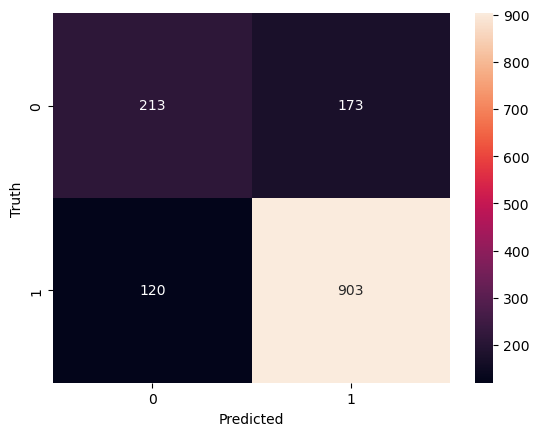

In [132]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [141]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7920511000709723


Accuracy: 0.7920511000709723


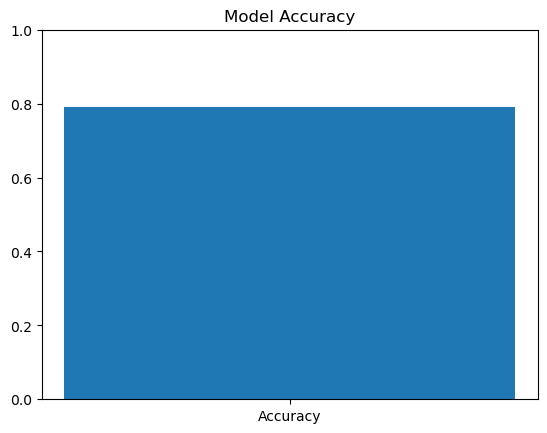

In [142]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

fig, ax = plt.subplots()
ax.bar(["Accuracy"], [accuracy])
ax.set_ylim(0, 1)
ax.set_title("Model Accuracy")
plt.show()

In [135]:
round((213 + 903)/(213+173+120+903),2)

0.79

In [138]:
precision_0 = round(precision_score(y_test, y_pred, pos_label=0), 2)
precision_1 = round(precision_score(y_test, y_pred, pos_label=1), 2)

print("Precision for class 0:", precision_0)
print("Precision for class 1:", precision_1)

Precision for class 0: 0.64
Precision for class 1: 0.84


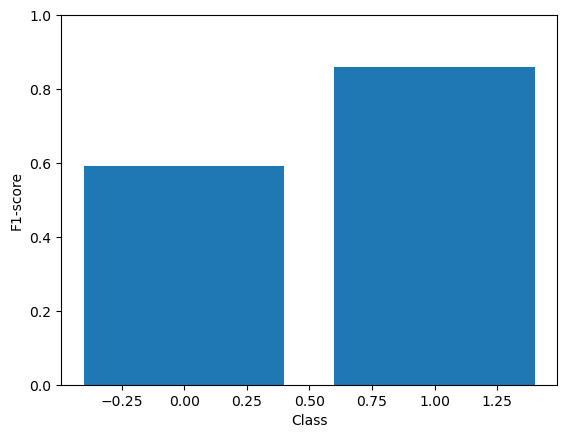

In [140]:
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Extract f1-score for each class
f1_scores = [report[str(i)]['f1-score'] for i in range(len(np.unique(y_test)))]

# Plot bar chart of f1-scores
fig, ax = plt.subplots()
ax.bar(np.unique(y_test), f1_scores)
ax.set_xlabel('Class')
ax.set_ylabel('F1-score')
ax.set_ylim([0,1])
plt.show()